In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
dft=pd.read_csv('electricity.csv' ,index_col='DateTime' ,parse_dates=True)

In [ ]:
dfm=pd.read_csv('electricity.csv' )

In [4]:
dfm.head(2)

DateTime Holiday  HolidayFlag  DayOfWeek  WeekOfYear  Day  Month  \
0  01/11/2011 00:00    None            0          1          44    1     11   
1  01/11/2011 00:30    None            0          1          44    1     11   

   Year  PeriodOfDay ForecastWindProduction SystemLoadEA  SMPEA  \
0  2011            0                 315.31      3388.77  49.26   
1  2011            1                 321.80      3196.66  49.26   

  ORKTemperature ORKWindspeed CO2Intensity ActualWindProduction SystemLoadEP2  \
0           6.00         9.30       600.71               356.00       3159.60   
1           6.00        11.10       605.42               317.00       2973.01   

  SMPEP2  
0  54.32  
1  54.23

In [45]:
columns=[ 'HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day',
       'Month', 'Year', 'PeriodOfDay', 'ForecastWindProduction',
       'SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2']

In [5]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [43]:
dfm.Holiday.unique()

array(['None', 'Christmas Eve', 'Christmas', "St Stephen's Day",
       "New Year's Eve", "New Year's Day", "St Patrick's Day",
       'Good Friday', 'Holy Saturday', 'Easter', 'Easter Monday',
       'May Day', 'June Bank Holiday', 'August Bank Holiday',
       'October Bank Holiday'], dtype=object)

In [71]:
df=dft

### Data cleaning:


In [ ]:
### Replace ?


In [72]:
for col in columns:
    d=df[df[col]=='?'][col].size
    print(col,d)

    if (df[col].dtype=='object'):
        if d<300:
            df[col].replace('?', df[col].mode()[0], inplace=True)
            # dfm.drop(dfm[dfm[col]=='?'].index,inplace=True)
            # print(dfm[col].value_counts())
            df[col]=pd.to_numeric(df[col])
        elif d>300:
            df.drop(columns=col,inplace=True)
            # print(dfm[dfm[col]=='?'])
     
    else:
        # print(col)
        pass

HolidayFlag 0
DayOfWeek 0
WeekOfYear 0
Day 0
Month 0
Year 0
PeriodOfDay 0
ForecastWindProduction 5
SystemLoadEA 2
SMPEA 2
ORKTemperature 295
ORKWindspeed 299
CO2Intensity 7
ActualWindProduction 5
SystemLoadEP2 2
SMPEP2 2


In [ ]:
# col=('Class AGE SEX STEROID ANTIVIRALS FATIGUE MALAISE ANOREXIA LIVERBIG LIVERFIRM SPLEEN SPIDERS ASCITES VARICES BILIRUBIN PHOSPHATE SGOT ALBUMIN PROTIME').split()
for col in dft.columns:
    dfm[col]=pd.to_numeric(dfm[col])

        
dfm.info()

In [109]:
df3=df

In [127]:
df=df3

In [128]:
for col in columns:
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    q_low = df[col].quantile(0.25) - 1.5 * IQR
    q_hi  = df[col].quantile(0.75) + 1.5 * IQR
    df = df[(df[col] < q_hi) & (df[col] > q_low)]

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Holiday                 0 non-null      object 
 1   HolidayFlag             0 non-null      int64  
 2   DayOfWeek               0 non-null      int64  
 3   WeekOfYear              0 non-null      int64  
 4   Day                     0 non-null      int64  
 5   Month                   0 non-null      int64  
 6   Year                    0 non-null      int64  
 7   PeriodOfDay             0 non-null      int64  
 8   ForecastWindProduction  0 non-null      float64
 9   SystemLoadEA            0 non-null      float64
 10  SMPEA                   0 non-null      float64
 11  ORKTemperature          0 non-null      float64
 12  ORKWindspeed            0 non-null      float64
 13  CO2Intensity            0 non-null      float64
 14  ActualWindProduction    0 non-null      float64
 15

### Visualization


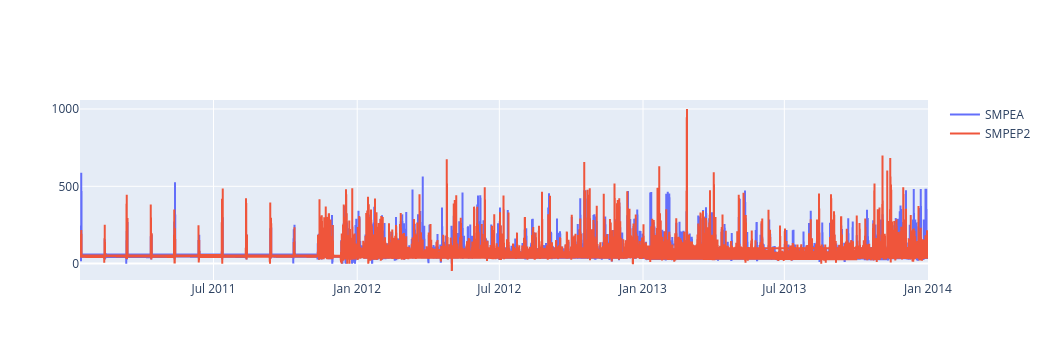

In [76]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=dft.index, y=df.SMPEA,  name="SMPEA", yaxis='y'))
fig.add_trace(go.Scatter(x=dft.index, y=df.SMPEP2 ,  name="SMPEP2"))

fig.show() 

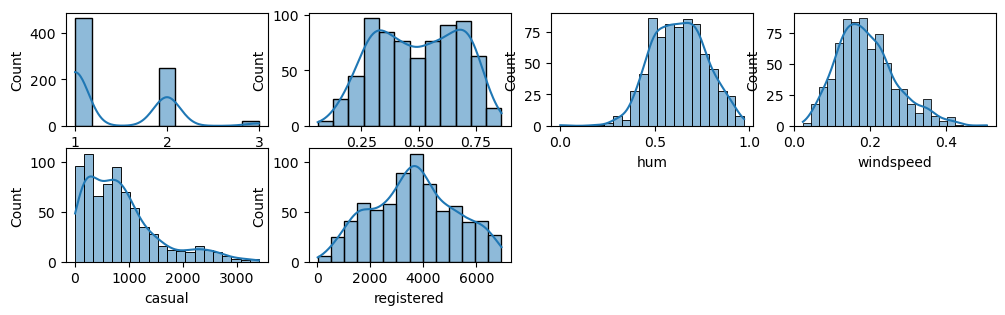

In [34]:
plt.figure(figsize=(12, 5))
no=340
for col in df.columns:
    no+=1
    plt.subplot(no)
    sns.histplot(df[col] , kde=True)  
    if no == 349:
        break

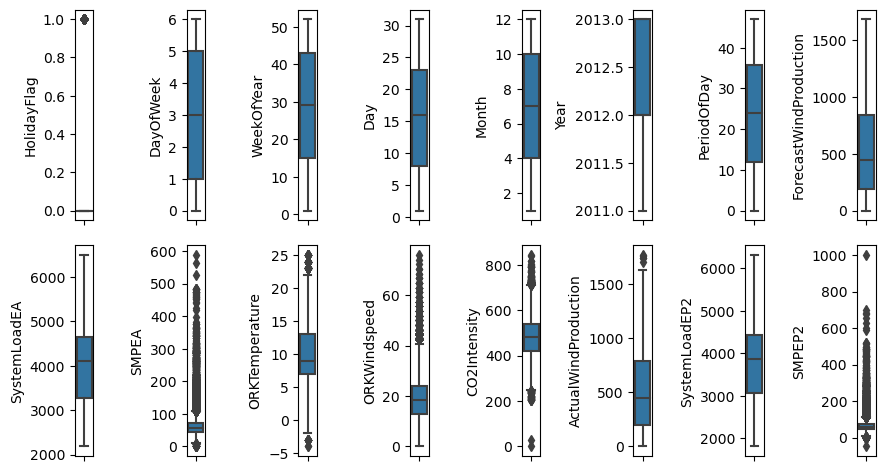

In [77]:
plt.figure(figsize=(9,5 ))
no=0
for col in columns:
    no+=1
    plt.subplot(2,8,no)
    plt.tight_layout()
    try:
        sns.boxplot(y=df[col])  
    except:
        print(col)

In [ ]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix ,classification_report , accuracy_score ,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier,Perceptron,LinearRegression, Ridge, SGDRegressor,LogisticRegression
from sklearn.model_selection import train_test_split

import math

### Modelling


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC,SVR



In [ ]:
cv = KFold(3, shuffle=True)
def cross_val(X: np.ndarray, y, model, cv_kfold_obj: KFold):
    acc = []
    for train_index, validation_index in cv_kfold_obj.split(X):
        acc.append(score_model(model, X[train_index], y[train_index], X[validation_index], y[validation_index]))
    return sum(acc)/len(acc)

In [80]:
df.head(1)

Holiday  HolidayFlag  DayOfWeek  WeekOfYear  Day  Month  Year  \
DateTime                                                                   
2011-01-11    None            0          1          44    1     11  2011   

            PeriodOfDay  ForecastWindProduction  SystemLoadEA  SMPEA  \
DateTime                                                               
2011-01-11            0                  315.31       3388.77  49.26   

            ORKTemperature  ORKWindspeed  CO2Intensity  ActualWindProduction  \
DateTime                                                                       
2011-01-11             6.0           9.3        600.71                 356.0   

            SystemLoadEP2  SMPEP2  
DateTime                           
2011-01-11         3159.6   54.32

In [89]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=85 )

In [103]:
errors = pd.DataFrame(columns=['R2SCORE', 'rmsep'])
def err(name,y_test, y_pred):
    R2SCORE = metrics.r2_score(y_test, y_pred)
    rmsep = 100*round(math.sqrt(metrics.mean_squared_error(y_test, y_pred)) / dft["SMPEP2"].mean(),2)
    errors.loc[name, :] = [R2SCORE, rmsep]

In [98]:
model = make_pipeline(preprocessing.StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
y_predict_lr= model.predict(X_test)
err('LinearRegression',y_test, y_predict_lr)

In [138]:
errors

R2SCORE rmsep
LinearRegression     0.407968  43.0
PolynomialFeatures   0.476024  40.0
BaggingRegressor     0.360277  45.0
PolynomialFeatures2  0.476024  40.0

In [107]:
ridge_poly_model = make_pipeline(preprocessing.StandardScaler(), 
              PolynomialFeatures(degree=2), 
              Ridge(alpha=1))
ridge_poly_model.fit(X_train, y_train)
y_predict_lr = ridge_poly_model.predict(X_test)
err('PolynomialFeatures',y_test, y_predict_lr)

In [137]:
pipe = make_pipeline(preprocessing.StandardScaler(), PolynomialFeatures(),Ridge())

model = GridSearchCV(pipe, param_grid={'polynomialfeatures__degree': [1, 2], 'polynomialfeatures__include_bias' :[True , False] , 'ridge__alpha': [0.5, 1,5, 10, 20,50]})
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

err('PolynomialFeatures2',y_test, y_predict_lr)
print(model.best_score_ , model.best_params_)

0.5039954326620849 {'polynomialfeatures__degree': 2, 'polynomialfeatures__include_bias': False, 'ridge__alpha': 0.5}


In [69]:
reg_bagging = BaggingRegressor(DecisionTreeRegressor(min_samples_leaf=5), n_estimators=100, bootstrap=False, n_jobs=-1, max_samples=50)
reg_bagging.fit(X_train, y_train)
y_predict = reg_bagging.predict(X_test)

In [ ]:
pipe = make_pipeline(StandardScaler(), SVR())
clf_gridSearch = GridSearchCV(pipe, param_grid={'svr__epsilon': [0.01], 'svr__C': [1]})
clf_gridSearch.fit(X_train, y_train)
y_predict = clf_gridSearch.predict(X_test)
err('SVR',y_test, y_predict)

In [ ]:
print(clf_gridSearch.best_score_ , clf_gridSearch.best_params_)
clf_gridSearch

In [130]:
from sklearn.ensemble import BaggingRegressor

reg_bagging = BaggingRegressor(DecisionTreeRegressor(min_samples_leaf=5), n_estimators=100, bootstrap=False, n_jobs=-1, max_samples=50)

reg_bagging.fit(X_train, y_train)
y_predict = reg_bagging.predict(X_test)
err('BaggingRegressor',y_test, y_predict)

In [139]:
errors

R2SCORE rmsep
LinearRegression     0.407968  43.0
PolynomialFeatures   0.476024  40.0
BaggingRegressor     0.360277  45.0
PolynomialFeatures2  0.476024  40.0

In [141]:
from sklearn import utils
from sklearn.model_selection import ParameterGrid
from sklearn.dummy import DummyRegressor
best=10000000
grid = ParameterGrid({"max_samples": [0.5, 1.0],
                          "max_features": [0.5, 1.0],
                          "bootstrap": [True, False],
                          "n_estimators":[1,100],
                          "bootstrap_features": [True, False]})

pipepoly = make_pipeline(preprocessing.StandardScaler(), PolynomialFeatures(),Ridge())
modelpoly = GridSearchCV(pipepoly, param_grid={'polynomialfeatures__degree': [1, 2], 'polynomialfeatures__include_bias' :[True , False] , 'ridge__alpha': [0.5, 1,5, 10, 20,50]})                                       

pipek = make_pipeline(preprocessing.StandardScaler(), KNeighborsRegressor())
modelkneighbors = GridSearchCV(pipek, param_grid={'kneighborsregressor__n_neighbors': [1,5 ]})

pipesvr = make_pipeline(preprocessing.StandardScaler(), SVR())
modelsvr = GridSearchCV(pipesvr, param_grid={'svr__epsilon': [0.001,  1, 10], 'svr__C': [0.1, 10, 100]})

for base_estimator in [
                           None,
                           # modelpoly,
                           DecisionTreeRegressor(),
                           modelkneighbors,
                           # modelsvr
]:
        for params in grid:
            # print(**params)
            model=BaggingRegressor(base_estimator=base_estimator, random_state=utils.check_random_state(0),**params)
            model.fit(X_train, y_train)
            y_predict= model.predict(X_test)
            
            # print(base_estimator, "R2_SCORE: ", metrics.r2_score(y_test, y_predict))
            # print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, y_predict))
            # print(math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / dfm["cnt"].mean())
            rmse=math.sqrt(metrics.mean_squared_error(y_test, y_predict))
            
            if  rmse < best:
                           best=rmse
                           bestr2=metrics.r2_score(y_test, y_predict) 
                           matrisresult=[base_estimator , params , bestr2,best ]
          
        try:
            print('estimator:',base_estimator, 'Parameters:', params, 'RMSE:' , rmse)   
        except:
            print('--------------------------------------------------------------------')
        
print('result:',matrisresult)
print("RMSE%: ", 100*round(best) / dfm["cnt"].mean(),2)


KeyboardInterrupt



In [ ]:
X_test=
"CO2Intensity"=491.32, "SystemLoadEA"=4241.05, "Day"=10, "ForecastWindProduction"=54.10, , "SMPEA"=49.56, "ORKTemperature"=9.0, "ORKWindspeed"=14.8, "ActualWindProduction"=54.0, "Month"=12, "SystemLoadEP2"=4426.84]

In [143]:
errors

R2SCORE rmsep
LinearRegression     0.407968  43.0
PolynomialFeatures   0.476024  40.0
BaggingRegressor     0.360277  45.0
PolynomialFeatures2  0.476024  40.0